In [3]:
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [4]:
%matplotlib inline
rcParams['figure.figsize']=5, 4
sb.set_style('whitegrid')

In [5]:
data=pd.read_csv("C:/true_car_listings.csv")

In [6]:
data.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


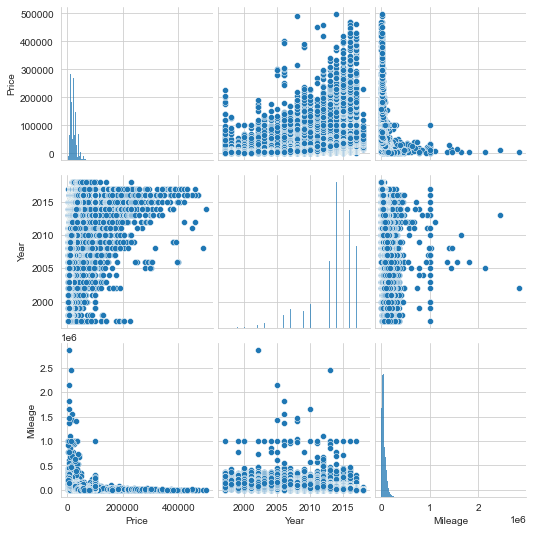

In [7]:
sb.pairplot(data)

In [8]:
data.corr()

,Price,Year,Mileage
Price,1.000000,0.401250,-0.421237
Year,0.401250,1.000000,-0.764849
Mileage,-0.421237,-0.764849,1.000000


In [9]:
# data_s=data.iloc[:,1:3].values
# data_target=data.iloc[:,0].values
# data_s_names=['Mileage','Year']
# X= scale(data_s)
# y=data_target

In [10]:
X=pd.DataFrame({'Year':data['Year'],'Mileage':data['Mileage']})
y=np.array(data['Price'])

In [11]:
X

,Year,Mileage
0,2014,35725
1,2013,19606
2,2013,48851
3,2014,39922
4,2016,22142
...,...,...
852117,2017,9
852118,2017,3201
852119,2016,28941
852120,2017,3005


In [12]:
X.describe()

,Year,Mileage
count,852122.000000,8.521220e+05
mean,2013.289145,5.250779e+04
std,3.414987,4.198896e+04
min,1997.000000,5.000000e+00
25%,2012.000000,2.383600e+04
50%,2014.000000,4.025600e+04
75%,2016.000000,7.218600e+04
max,2018.000000,2.856196e+06


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [15]:
regressor.intercept_

-1488446.7122274395

In [16]:
regressor.coef_

array([ 7.52312120e+02, -8.97877532e-02])

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,35986,28448.757901
1,21250,20100.499182
2,9995,15712.231997
3,30698,22859.349082
4,13265,25666.434469
...,...,...
170420,18483,24948.062120
170421,6990,15188.937041
170422,22720,23764.499422
170423,6888,10431.923483


In [19]:
from sklearn import metrics
print('R2 of Linear Regression:',(metrics.r2_score(y_test,y_pred)))
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

R2 of Linear Regression: 0.19017621995193568
Mean Absolute Error: 7838.62
Mean Squared Error: 151489171.47
Root Mean Squared Error: 12308.09


In [20]:
a=regressor.predict(np.array([2015,20000]).reshape(1, -1))
a

array([25666.45393344])